Data Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!wget https://www.dropbox.com/s/jpw4fyv6mh31ql4/NTP2015-2017fire.txt

--2022-01-02 08:19:51--  https://www.dropbox.com/s/jpw4fyv6mh31ql4/NTP2015-2017fire.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/jpw4fyv6mh31ql4/NTP2015-2017fire.txt [following]
--2022-01-02 08:19:51--  https://www.dropbox.com/s/raw/jpw4fyv6mh31ql4/NTP2015-2017fire.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd505f9d58e39a4b9f15b9e2611.dl.dropboxusercontent.com/cd/0/inline/BdBHVwk2vP7MjEJSmZ8NvDDDiAVyLYkSMyYzTZfJ5AbHTCfI8mbPHwuvoSkEQjtZ6BggMRrZh3Ogsp0jcvJZZnptx2Wzs2_oIaVv6auUvEYzGxK0pzo9ju30dVZpU9HRLdqmSgNaxHwmZ2GpE3qxnO0r/file# [following]
--2022-01-02 08:19:51--  https://ucd505f9d58e39a4b9f15b9e2611.dl.dropboxusercontent.com/cd/0/inline/BdBHVwk2vP7MjEJSmZ8NvDDDiAVyLYkSMyYzTZfJ5AbHTCfI8mbPHwuvoSkEQjtZ6B

In [2]:
%cd /content/
#df = pd.read_csv('/content/gdrive/MyDrive/dlku/NTP2015fire-Jan.txt', sep='\t', header=None)
df = pd.read_csv('NTP2015-2017fire.txt', sep='\t', header=None)
df.columns = ["date", "station", "addr1", "addr2", "longitude", "latitude", "township"]

/content


In [3]:
df

,date,station,addr1,addr2,longitude,latitude,township
0,2015/1/1 0:13,火警-瓦斯漏氣,新北市板橋區重慶路245巷 擎天雙星,新北市板橋區重慶路245巷100號,121.466281,25.000569,板橋區廣德里
1,2015/1/1 0:16,火警-倉庫,新北市三重區富福街48號;5樓,新北市三重區富福街45號,121.491579,25.084172,三重區富華里
2,2015/1/1 0:48,火警-查看案件,新北市淡水區民權路139號;11樓,新北市淡水區民權路139號,121.460224,25.136422,淡水區民權里
3,2015/1/1 0:56,火警-查看案件,新北市新莊區 新月橋近新莊端,新北市新莊區,121.450333,25.031506,新莊區泰豐里
4,2015/1/1 1:04,火警-汽車,新北市樹林區八德街71巷,新北市樹林區八德街71巷10號,121.420005,24.982273,樹林區和平里
...,...,...,...,...,...,...,...
24085,2017/12/31 17:14,火警-集合住宅,新北市中和區圓通路305巷3弄7號 對面5樓,新北市中和區圓通路305巷5弄7號,121.493909,24.990417,中和區錦盛里
24086,2017/12/31 18:40,火警-集合住宅,新北市汐止區橫科路322巷24弄6號1樓,新北市汐止區橫科路322巷24弄6號之1,121.621682,25.048063,汐止區東勢里
24087,2017/12/31 20:09,火警-查看案件,新北市三重區溪尾街30號,新北市三重區溪尾街30號,121.490806,25.076529,三重區福隆里
24088,2017/12/31 20:44,火警-查看案件,新北市永和區民族街67巷27弄5號,新北市永和區民族街67巷27弄5號,121.519391,24.997367,永和區民族里


In [4]:
#set date time format
df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d %H:%M:%S')

In [5]:
#extract only numerical/quantitative data
dften = df[["date", "longitude", "latitude"]]

In [6]:
dften

,date,longitude,latitude
0,2015-01-01 00:13:00,121.466281,25.000569
1,2015-01-01 00:16:00,121.491579,25.084172
2,2015-01-01 00:48:00,121.460224,25.136422
3,2015-01-01 00:56:00,121.450333,25.031506
4,2015-01-01 01:04:00,121.420005,24.982273
...,...,...,...
24085,2017-12-31 17:14:00,121.493909,24.990417
24086,2017-12-31 18:40:00,121.621682,25.048063
24087,2017-12-31 20:09:00,121.490806,25.076529
24088,2017-12-31 20:44:00,121.519391,24.997367


In [7]:
BBox = ((dften.longitude.min(),   dften.longitude.max(),      
         dften.latitude.min(), dften.latitude.max()))
BBox

(121.2868855, 122.0030709, 24.77511693, 25.29717505)

In [8]:
#split dataframe into 3 years
df15 = dften[dften['date'].dt.year == 2015]
df16 = dften[dften['date'].dt.year == 2016]
df17 = dften[dften['date'].dt.year == 2017]

In [9]:
def cytogenesis(df, nc, mapedges):
  #def calculate_cellsize(nc, mapedges):
  def calculate_cellsize():
    global lonmin
    global lonmax
    global latmin
    global latmax
    lonmin = mapedges[0]
    lonmax = mapedges[1]
    latmin = mapedges[2]
    latmax = mapedges[3]
    global csize_lon
    global csize_lat
    csize_lon = (lonmax - lonmin)/nc
    csize_lat = (latmax - latmin)/nc
    #print(csize_lon)
    #print(csize_lat)
    return csize_lon, csize_lat, lonmin, lonmax, latmin, latmax

  #call the 1st subfunction
  #csize_lon, csize_lat = calculate_cellsize(nc, mapedges)
  csize_lon, csize_lat, lonmin, lonmax, latmin, latmax = calculate_cellsize()
  
  #def draw_lines(nc,csize_lon,csize_lat):
  def draw_lines():
    global pixgrade_lon_left
    global pixgrade_lon_right
    global pixgrade_lat_bottom
    global pixgrade_lat_top

    pixgrade_lon_left = np.zeros(nc, dtype="float64")
    pixgrade_lon_right = np.zeros(nc, dtype="float64")
    pixgrade_lat_bottom = np.zeros(nc, dtype="float64")
    pixgrade_lat_top = np.zeros(nc, dtype="float64")
    #draw block boundaries
    for i in range (0,nc,1):

      pixgrade_lon_left[i] = lonmin + ((i)*(csize_lon))
      pixgrade_lon_right[i] = lonmin + ((i+1)*(csize_lon))
      pixgrade_lat_bottom[i] = latmin + ((i)*(csize_lat))
      pixgrade_lat_top[i] = latmin + ((i+1)*(csize_lat))
    
    #print(pixgrade_lon_left)
    #print(pixgrade_lon_right)
    #print(pixgrade_lat_bottom)
    #print(pixgrade_lat_top)
    return pixgrade_lon_left, pixgrade_lon_right, pixgrade_lat_bottom, pixgrade_lat_top

  #pixgrade_lon_left, pixgrade_lon_right, pixgrade_lat_bottom, pixgrade_lat_top = draw_lines(nc,csize_lon,csize_lat)
  pixgrade_lon_left, pixgrade_lon_right, pixgrade_lat_bottom, pixgrade_lat_top = draw_lines()

  #def cell_loader(df, nc, csize_lon, csize_lat, pixgrade_lon_left, pixgrade_lon_right, pixgrade_lat_bottom, pixgrade_lat_top):
  def cell_loader():  
    #create a board
    block = np.zeros((nc, nc), dtype="float32")
    point = np.zeros([len(df),2])

    for i in range (0,len(df),1):
      point[i,0] = df.longitude[i]
      point[i,1] = df.latitude[i]
      #the inner nested loop considers where to place each point into a cell
      for j in range (0,nc,1):
        for k in range (0,nc,1):
          if ((point[i,0] >= pixgrade_lon_left[j]) & (point[i,0] < pixgrade_lon_right[j]) & (point[i,1] >= pixgrade_lat_bottom[k]) & (point[i,1] < pixgrade_lat_top[k])):
            block[j,k] += 1
    #orgaise the cell tablet for proper visualisation
    global bq
    bq = np.rot90(block, k=1)
    bq = bq.astype(np.uint8)

    def heatmap2d(arr: np.ndarray):
      plt.imshow(arr, cmap='viridis')
      plt.colorbar()
      plt.show()

    heatmap2d(bq)
    return bq

  bq = cell_loader()
  return bq

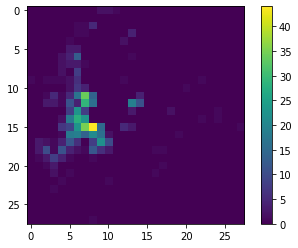

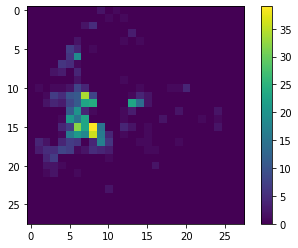

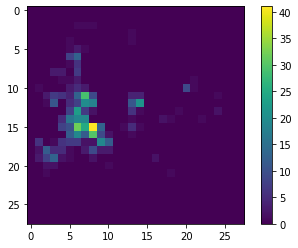

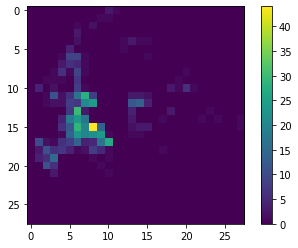

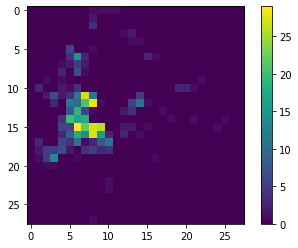

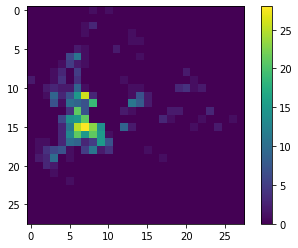

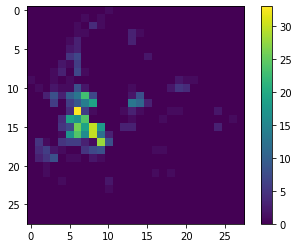

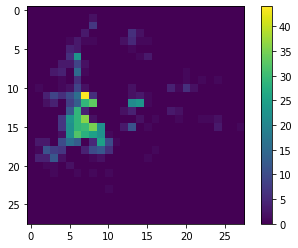

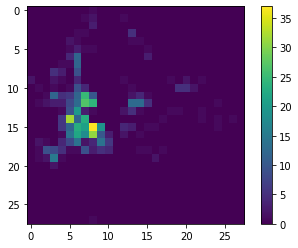

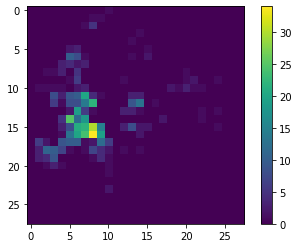

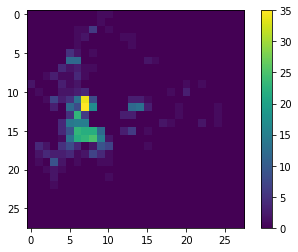

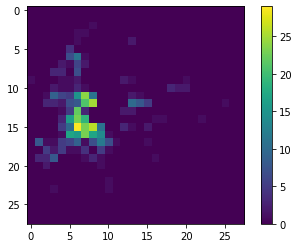

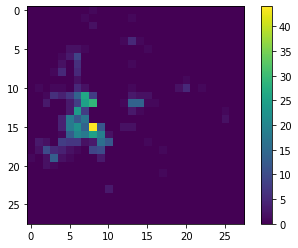

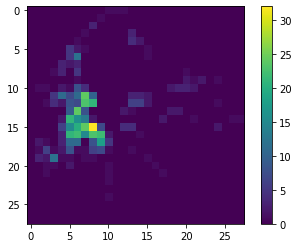

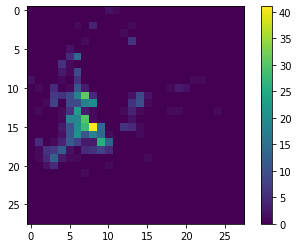

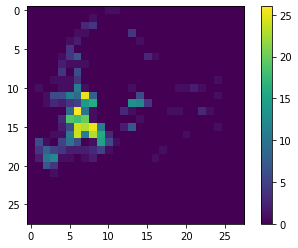

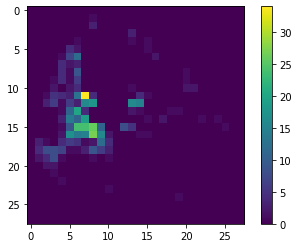

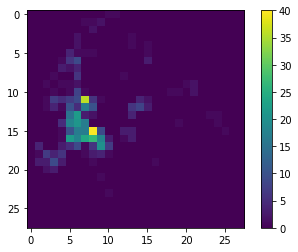

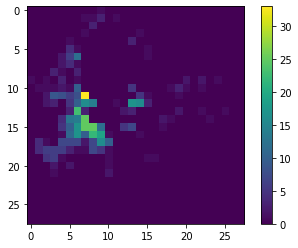

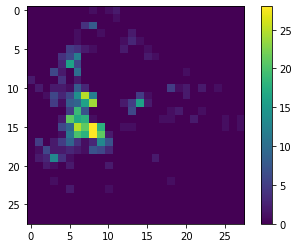

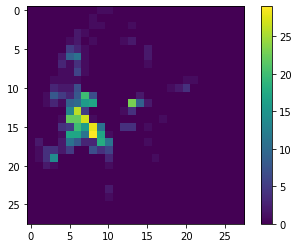

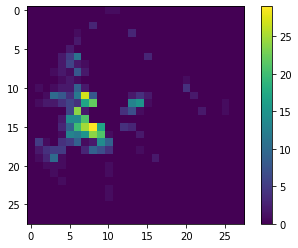

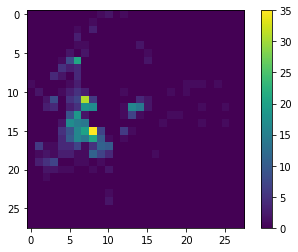

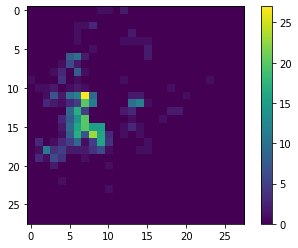

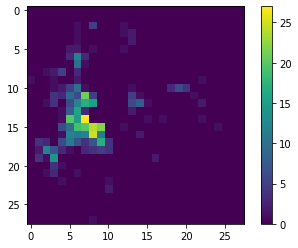

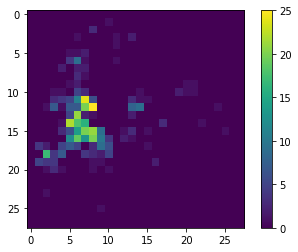

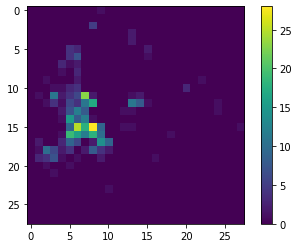

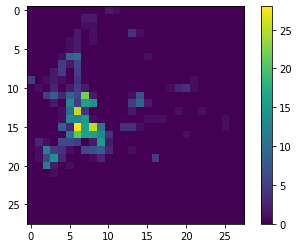

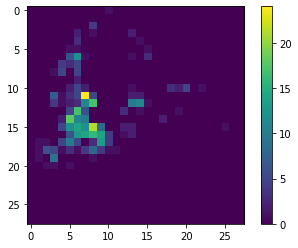

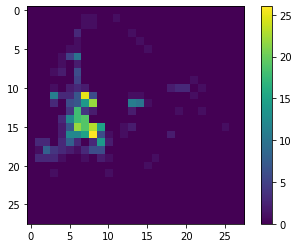

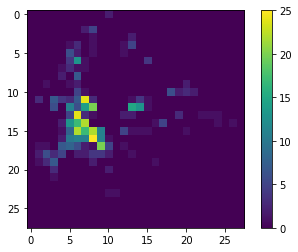

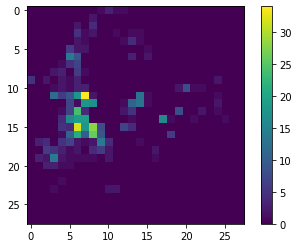

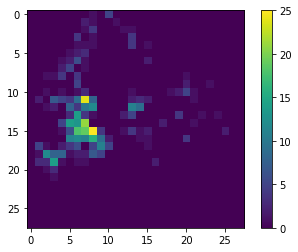

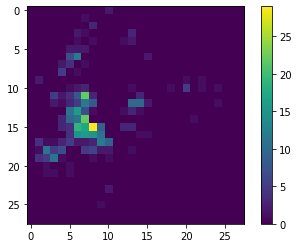

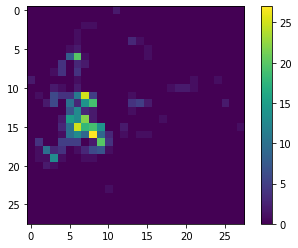

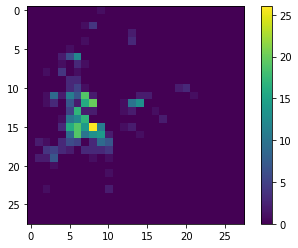

In [10]:
def dozenisation(dff, BBox=BBox):

  figtensor = np.zeros([12,28,28])
  for i in range(0,12,1):
    timeframe = (dff['date'].dt.month == i+1)
    df00 = dff.loc[timeframe]
    df00 = df00.reset_index(drop=True)
    df00.head()
    fig0 = cytogenesis(df00, 28, BBox)
    figtensor[i] = fig0
  return figtensor

figtensor15 = dozenisation(df15)
figtensor16 = dozenisation(df16)
figtensor17 = dozenisation(df17)
figtensor = np.concatenate((figtensor15, figtensor16, figtensor17), axis=0)

In [11]:
figtensor.shape

(36, 28, 28)

In [12]:
def ttsplit(dataarray):
  trainarr = np.zeros([24,28,28], dtype='uint8')
  testarr = np.zeros([12,28,28], dtype='uint8')
  j = 0
  k = 0
  for i in range (0, len(dataarray), 1):
    if (i % 3 == 2):
      testarr[j,:,:] = dataarray[i,:,:]
      j+=1
    else:
      trainarr[k,:,:] = dataarray[i,:,:]
      k+=1
  return trainarr, testarr

traindata, testdata = ttsplit(figtensor)

def colour_normalisation(nparray):
  maxcolour = figtensor.max()
  halfbound = float(maxcolour / 2)
  nparray = nparray.astype('float32')
  new_arr = (nparray-halfbound) / halfbound
  return new_arr

traindata = colour_normalisation(traindata)
testdata = colour_normalisation(testdata)
print(traindata.shape)
print(testdata.shape)

(24, 28, 28)
(12, 28, 28)


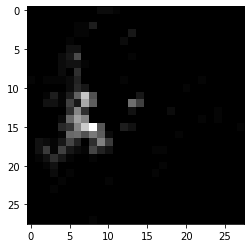

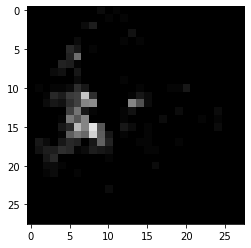

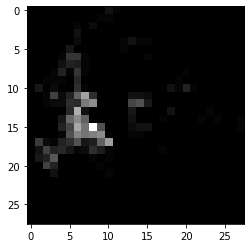

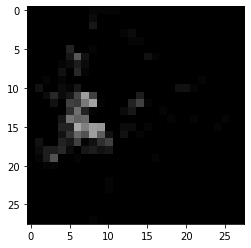

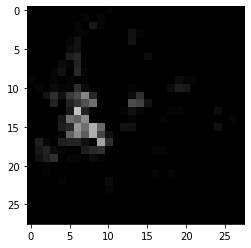

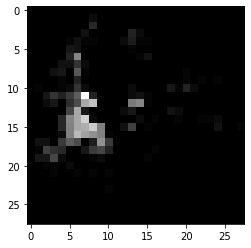

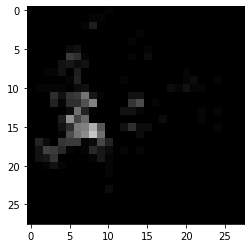

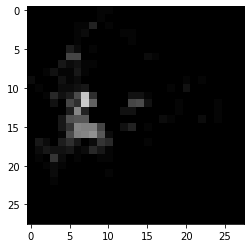

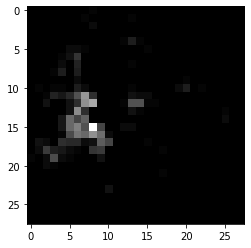

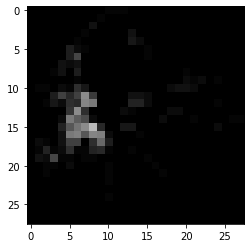

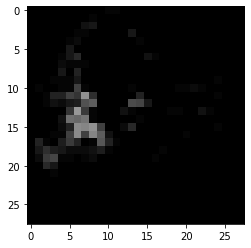

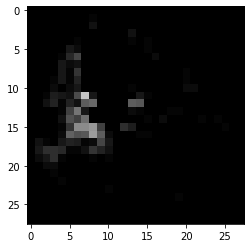

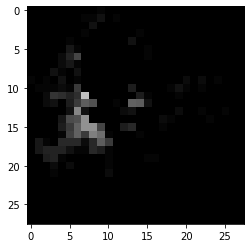

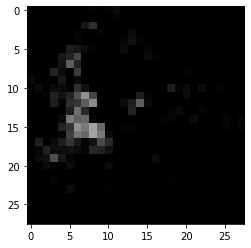

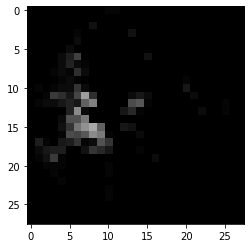

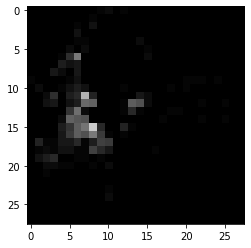

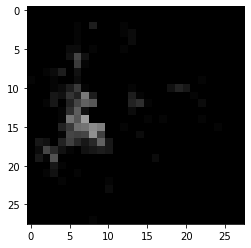

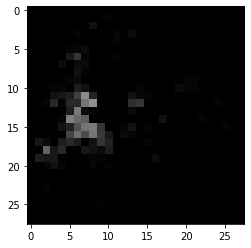

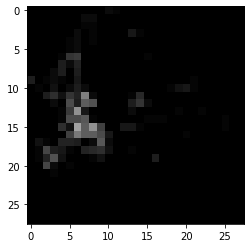

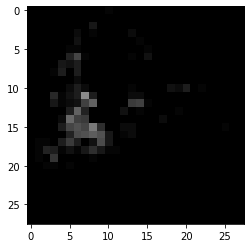

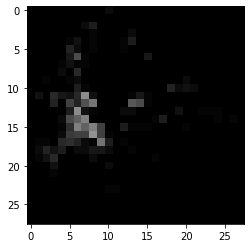

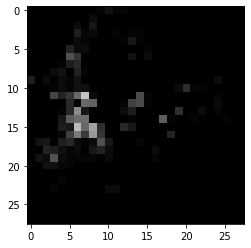

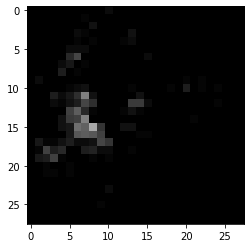

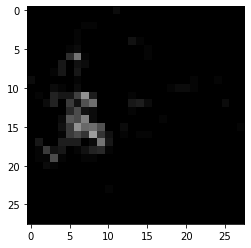

In [13]:
for i in range(0, len(traindata),1):
  plt.imshow(traindata[i], cmap='gray', vmin=-1, vmax=1)
  plt.show()

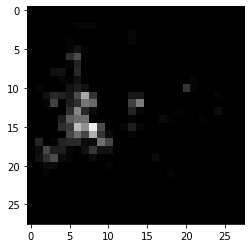

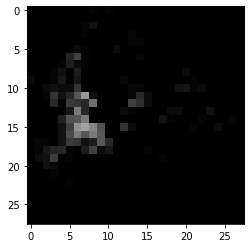

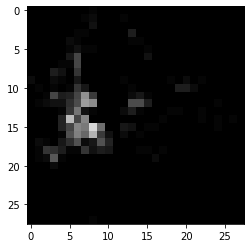

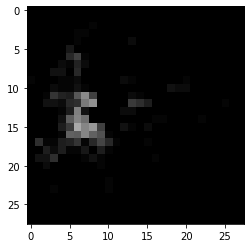

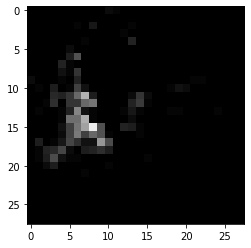

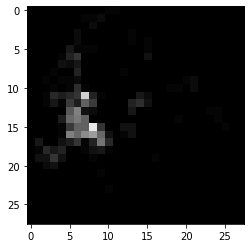

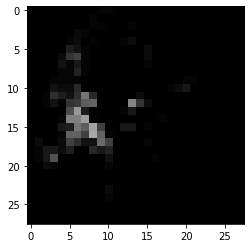

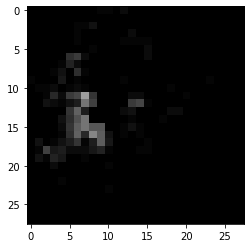

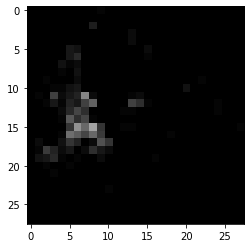

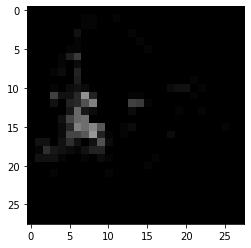

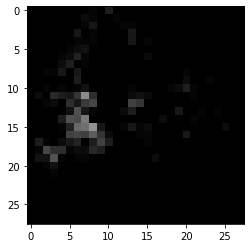

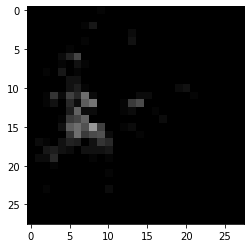

In [14]:
for i in range(0, len(testdata),1):
  plt.imshow(testdata[i], cmap='gray', vmin=-1, vmax=1)
  plt.show()

Import Libraries

In [15]:
import tensorflow as tf

In [16]:
tf.__version__

'2.7.0'

In [17]:
# To generate GIFs
!pip install imageio
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-mja8pu9n
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-mja8pu9n
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=162411 sha256=51648c39b174738a9e6ce05d85210612235b45053a414b52b3e6518b61615ac3
  Stored in directory: /tmp/pip-ephem-wheel-cache-ljretxuf/wheels/cc/c4/d8/5341e93b6376c5c929c49469fce21155eb69cef1a4da4ce32c
Successfully built tensorflow-docs


In [18]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
import math

from IPython import display

Reload the dataset

In [19]:
train_labels = ['15','16','17']
test_labels = ['15','16','17']
#since we had already normalised the dataset, we can randomise a batch rightaway
BUFFER_SIZE = 24
BATCH_SIZE = 12
train_images = traindata
test_images = testdata
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

### The Generator

In the DCGAN architecture, the model is split into 2 parts - the generator and the discriminator.

The generator uses `tf.keras.layers.Conv2DTranspose` (upsampling) layers to produce an image from a seed (random noise). Start with a `Dense` layer that takes this seed as input, then upsample several times until you reach the desired image size of 28x28x1. Notice the `tf.keras.layers.LeakyReLU` activation for each layer, except the output layer which uses tanh.

In [20]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

Use the (as yet untrained) generator to create an image.

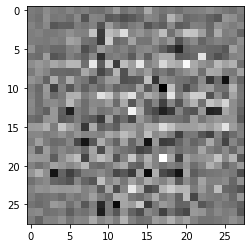

In [21]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

### The Discriminator

The discriminator is a CNN-based image classifier.

In [22]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

Use the (as yet untrained) discriminator to classify the generated images as real or fake. The model will be trained to output positive values for real images, and negative values for fake images.

In [23]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[-0.00340845]], shape=(1, 1), dtype=float32)


## Define the loss and optimizers

Define loss functions and optimizers for both models.


In [24]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
mse = tf.keras.losses.MeanSquaredError()

### Discriminator loss

This method quantifies how well the discriminator is able to distinguish real images from fakes. It compares the discriminator's predictions on real images to an array of 1s, and the discriminator's predictions on fake (generated) images to an array of 0s.

In [25]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

### Generator loss
The generator's loss quantifies how well it was able to trick the discriminator. Intuitively, if the generator is performing well, the discriminator will classify the fake images as real (or 1). Here, compare the discriminators decisions on the generated images to an array of 1s.

In [26]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [27]:
generator_optimizer = tf.keras.optimizers.Adam(1e-3) #lr = 0.001
discriminator_optimizer = tf.keras.optimizers.Adam(1e-3)

### Save checkpoints
This notebook also demonstrates how to save and restore models, which can be helpful in case a long running training task is interrupted.

In [28]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

## Define the training loop


In [29]:
EPOCHS = 100
noise_dim = 100
num_examples_to_generate = 12

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

The training loop begins with generator receiving a random seed as input. That seed is used to produce an image. The discriminator is then used to classify real images (drawn from the training set) and fakes images (produced by the generator). The loss is calculated for each of these models, and the gradients are used to update the generator and discriminator.

In [30]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [31]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as you go
    display.clear_output(wait=True)
    predA = generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  predB = generate_and_save_images(generator,
                           epochs,
                           seed)
  return predB

**Generate and save images**


In [32]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(3, 4))

  for i in range(predictions.shape[0]):
      plt.subplot(3, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.title(epoch, color='g')
  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

  return predictions

## Train the model
Call the `train()` method defined above to train the generator and discriminator simultaneously. Note that training GANs can be tricky. It's important that the generator and discriminator do not overpower each other (e.g., that they train at a similar rate).

At the beginning of the training, the generated images look like random noise. As the training progresses, the generated heatmaps will look increasingly real. After about 100 epochs, they resemble source heatmaps. This may take about one minute / epoch with the default settings on Colab.

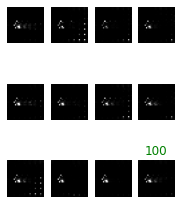

In [33]:
predB = train(train_dataset, EPOCHS)

Restore the latest checkpoint.

In [34]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

Prepare to calculate metrics

In [35]:
predB.shape
predB = tf.squeeze(predB)

In [36]:
gt = test_images
gt.shape
#it seems that the shape doesn't match the prediction batch size

(12, 28, 28)

In [37]:
#Unless your prediction dimensions (i.e. number of generated images) match the ground truth one, remove the quotation marks to run this block.
'''sq1 = np.arange(12)
sq2 = np.random.choice(sq1, 9, replace=False)
gtnew = np.zeros([9,28,28])

for i in range (0,len(sq2),1):
  gtnew[i,:,:] = gt[sq2[i],:,:]'''

'sq1 = np.arange(12)\nsq2 = np.random.choice(sq1, 9, replace=False)\ngtnew = np.zeros([9,28,28])\n\nfor i in range (0,len(sq2),1):\n  gtnew[i,:,:] = gt[sq2[i],:,:]'

Calculate Test Metrics

In [38]:
gtnew = gt
gtnew.shape

(12, 28, 28)

In [39]:
predB.shape

TensorShape([12, 28, 28])

In [40]:
predC = predB.numpy()
predC.shape

(12, 28, 28)

Test Metrics

In [41]:
mse = tf.keras.losses.MeanSquaredError()
mae = tf.keras.losses.MeanAbsoluteError()
mape = tf.keras.losses.MeanAbsolutePercentageError()
mseA = mse(gtnew, predC)
mseA = mseA.numpy()
rmse = math.sqrt(mseA)
maeA = mae(gtnew, predC)
maeA = maeA.numpy()
mapeA = mape(gtnew, predC)
mapeA = mapeA.numpy()

print('test MSE =', mseA)
print('test RMSE =' , rmse)
print('test MAE =', maeA)
print('test MAPE =', mapeA)

test MSE = 0.018435907
test RMSE = 0.13577888870819918
test MAE = 0.041023523
test MAPE = 554895.5


## Create a GIF


In [42]:
# Display a single image using the epoch number
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

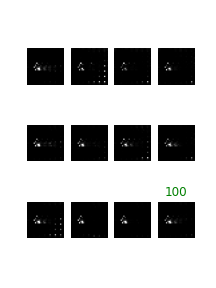

In [43]:
display_image(EPOCHS)

Use `imageio` to create an animated gif using the images saved during training.

In [44]:
anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)


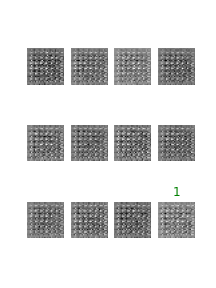

In [45]:
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)

Calculate Train Mertics

In [55]:
print(predB.shape)
predB = tf.squeeze(predB)
gt = train_images
print(gt.shape)
#it seems that the shape doesn't match the prediction batch size

(12, 28, 28)
(24, 28, 28)


In [56]:
#Unless your prediction dimensions (i.e. number of generated images) match the ground truth one, remove the quotation marks to run this block.
selectseq = np.random.choice(24, 12, replace=False)
gtnew = np.zeros([12,28,28])

for i in range (0,len(selectseq),1):
  gtnew[i,:,:] = gt[selectseq[i],:,:]

In [57]:
gtnew.shape

(12, 28, 28)

In [58]:
predB.shape

TensorShape([12, 28, 28])

In [59]:
predC = predB.numpy()
predC.shape

(12, 28, 28)

In [60]:
mse = tf.keras.losses.MeanSquaredError()
mae = tf.keras.losses.MeanAbsoluteError()
mape = tf.keras.losses.MeanAbsolutePercentageError()
mseA = mse(gtnew, predC)
mseA = mseA.numpy()
rmse = math.sqrt(mseA)
maeA = mae(gtnew, predC)
maeA = maeA.numpy()
mapeA = mape(gtnew, predC)
mapeA = mapeA.numpy()

print('test MSE =', mseA)
print('test RMSE =' , rmse)
print('test MAE =', maeA)
print('test MAPE =', mapeA)

test MSE = 0.021133374
test RMSE = 0.14537322457312632
test MAE = 0.044472903
test MAPE = 916254.56
